In [114]:
import numpy as np
from scipy.integrate import quad
import cmath
import matplotlib.pyplot as plt
%matplotlib widget

In [115]:
L=[1,2,5,10,20,50,100,200]

def init(N):
    M=np.array([[0 for _ in range(N+1)] for _ in range(N+1)])
    vu=np.array([[False for _ in range(N+1)] for _ in range(N+1)])
    for j in L:
        if j<=N:
            M[j,1]=1
            vu[j,1]=True
    return M,vu


def evolue(M,vu,N,k):
    s=0
    for j in L:
        valeur = 0
        if (N-j)>=0 and (k-1)>=0:
            if vu[N-j,k-1]:
                valeur = M[N-j,k-1]
            else:
                valeur = evolue(M,vu,N-j,k-1)
        s+=valeur
    M[N,k]=s
    vu[N,k]=True
    return s

def u(n):
    M,vu=init(n)
    s=0
    for j in range(1,n+1):
        s+=evolue(M,vu,n,j)
    return s

# merde on a tenu compte de l'ordre

Sans tenir compte de l'ordre on doit juste calculer un coefficient de série entière

In [116]:
def f(M,n,prec):
    def g(x):
        p=1
        for i in M:
            p*=1/(1-(prec**i)*(np.exp(n*x*1j)))
        return p*np.exp(-1j*n*x)
    return g


In [117]:
# Pour calculer une intégrale maintenant


def u(n,prec):
    
    return 1/(2*np.pi)*quad(f(L,n,prec),0,2*np.pi)[0]*prec**(-n)

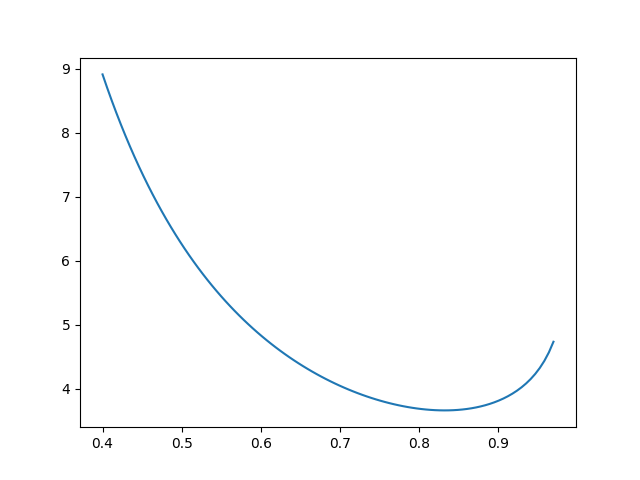

In [124]:
plt.close()
X=np.linspace(0.4,0.97,100)
plt.plot(X,[u(3,x) for x in X])
plt.show()




METHODE DE MERDEEEEEEEEEEE $ \\$
On va faire la méthode avec le produit de séries entières (ou plutôt de polynomes avec des termes en dessous de n)
-> On obtient une formule par récurrence avec des produits de convolution